In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
file_path = 'dds_datasets/dds_ch2_nyt/nyt1.csv'

In [3]:
df = pandas.DataFrame.from_csv(file_path, index_col=None)

In [4]:
df.keys()

Index(['Age', 'Gender', 'Impressions', 'Clicks', 'Signed_In'], dtype='object')

In [5]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


In [6]:
dir(df)

['Age',
 'Clicks',
 'Gender',
 'Impressions',
 'Signed_In',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod_

In [7]:
break_point = {
    17: '<18',
    24: '18-24',
    34: '25-34',
    44: '35-44',
    54: '45-54',
    64: '55-64',   
}
def group_by(age):
    for bp, key_str in break_point.items():
        if age > bp:
            continue
        key = key_str
        break
    else:
        key = '>64'
    return key

In [8]:
group_by(24)

'18-24'

In [9]:
df['Age2'] = df['Age'].apply(group_by)

In [10]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,Age2
0,36,0,3,0,1,35-44
1,73,1,3,0,1,>64
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54


In [11]:
def render_graph(*args):
    plt.plot(*args)
    plt.show()

In [12]:
df['ctr'] = df['Clicks'].divide(df['Impressions'])

In [13]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,Age2,ctr
0,36,0,3,0,1,35-44,0.0
1,73,1,3,0,1,>64,0.0
2,30,0,3,0,1,25-34,0.0
3,49,1,3,0,1,45-54,0.0
4,47,1,11,0,1,45-54,0.0


In [21]:
df['ctr'][df['Age2'] == '>64'].mean()

0.029802702385084374

In [23]:
df['ctr'][df['Age2'] == '>64'].count()

28556

In [26]:
df[df['Age2'] == '>64'].groupby(['ctr']).groups.keys()

dict_keys([0.0, 0.058823529411764705, 0.0625, 0.066666666666666666, 0.071428571428571425, 0.076923076923076927, 0.083333333333333329, 0.090909090909090912, 0.10000000000000001, 0.1111111111111111, 0.125, 0.13333333333333333, 0.14285714285714285, 0.15384615384615385, 0.16666666666666666, 0.18181818181818182, 0.20000000000000001, 0.21428571428571427, 0.22222222222222221, 0.23076923076923078, 0.25, 0.27272727272727271, 0.2857142857142857, 0.29999999999999999, 0.33333333333333331, 0.375, 0.40000000000000002, 0.42857142857142855, 0.44444444444444442, 0.5, 0.5714285714285714, 0.59999999999999998, 0.66666666666666663, 0.75, 1.0])

In [37]:
ctr_group_65 = df[df['Age2'] == '>64'][df['ctr'] > 0.0].groupby(['ctr'])

/Users/binaleebin/.pyenv/versions/3.6.3/envs/doing-data-science/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [38]:
ctr_group_65['Age2'].count()

ctr
0.062500      1
0.066667      3
0.071429      5
0.076923     15
0.083333     30
0.090909     65
0.100000    127
0.111111    220
0.125000    417
0.142857    545
0.153846      2
0.166667    675
0.181818     10
0.200000    674
0.214286      1
0.222222     29
0.230769      1
0.250000    577
0.285714     41
0.333333    417
0.375000      2
0.400000     40
0.428571      2
0.500000    153
0.600000      1
0.666667      9
0.750000      1
1.000000     21
Name: Age2, dtype: int64

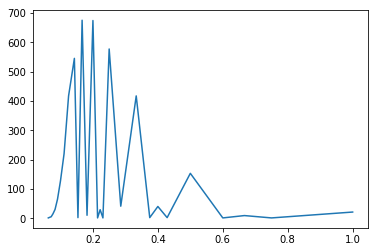

In [39]:
render_graph(ctr_group_65['Age2'].count())